In [83]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
import matplotlib.colors as mcolors

In [84]:
ROOT_PATH = "../../../desarrollo/"

csv_file = ROOT_PATH + "Data/Annotations/audio_annotations.csv"

audio_name = "AM1_20230514_110000.WAV"

In [85]:
# Load image from audio
image_name = audio_name.replace(".WAV", "")

# Define the root path for the Images directory
image_root_directory = ROOT_PATH + "Data/Dataset/Images/"

In [86]:
# Read the CSV file
df = pd.read_csv(csv_file)

# Filter rows that match the given audio name
filtered_df = df[df['path'].str.contains(audio_name)]

# Delete indexes from the filtered dataframe
filtered_df.reset_index(drop=True, inplace=True)

In [87]:
filtered_df

,path,annotator,recorder,date,time,audio_duration,start_time,end_time,low_frequency,high_frequency,specie
0,AM1/2023_05_14/AM1_20230514_110000.WAV,Edu,AM1,2023/05/14,11:00:00,00:01:00,0.000000,60.000000,0.000000,2457.595703,abiotic noise
1,AM1/2023_05_14/AM1_20230514_110000.WAV,Edu,AM1,2023/05/14,11:00:00,00:01:00,37.939403,39.619472,2897.536377,4894.215332,unknown
2,AM1/2023_05_14/AM1_20230514_110000.WAV,Edu,AM1,2023/05/14,11:00:00,00:01:00,58.035612,58.380241,3440.106445,4210.101074,cyanopica cooki
3,AM1/2023_05_14/AM1_20230514_110000.WAV,Edu,AM1,2023/05/14,11:00:00,00:01:00,54.210224,55.295807,2489.437500,3969.845947,unknown


In [88]:
# Function to convert HH:MM:SS format to seconds
def hms_to_seconds(hms):
    if isinstance(hms, str):
        time_parts = hms.split(':')
        if len(time_parts) == 3:
            hours, minutes, seconds = map(int, time_parts)
            total_seconds = hours * 3600 + minutes * 60 + seconds
            return total_seconds
    elif isinstance(hms, float):
        return float(hms)
    return None

In [89]:
filtered_df["path"][0].replace(".WAV", ".PNG")

'AM1/2023_05_14/AM1_20230514_110000.PNG'

In [90]:
image_path = ROOT_PATH + "Data/Dataset/Images/"
print(image_path)

../../../desarrollo/Data/Dataset/Images/


AM1_20230514_110000.WAV


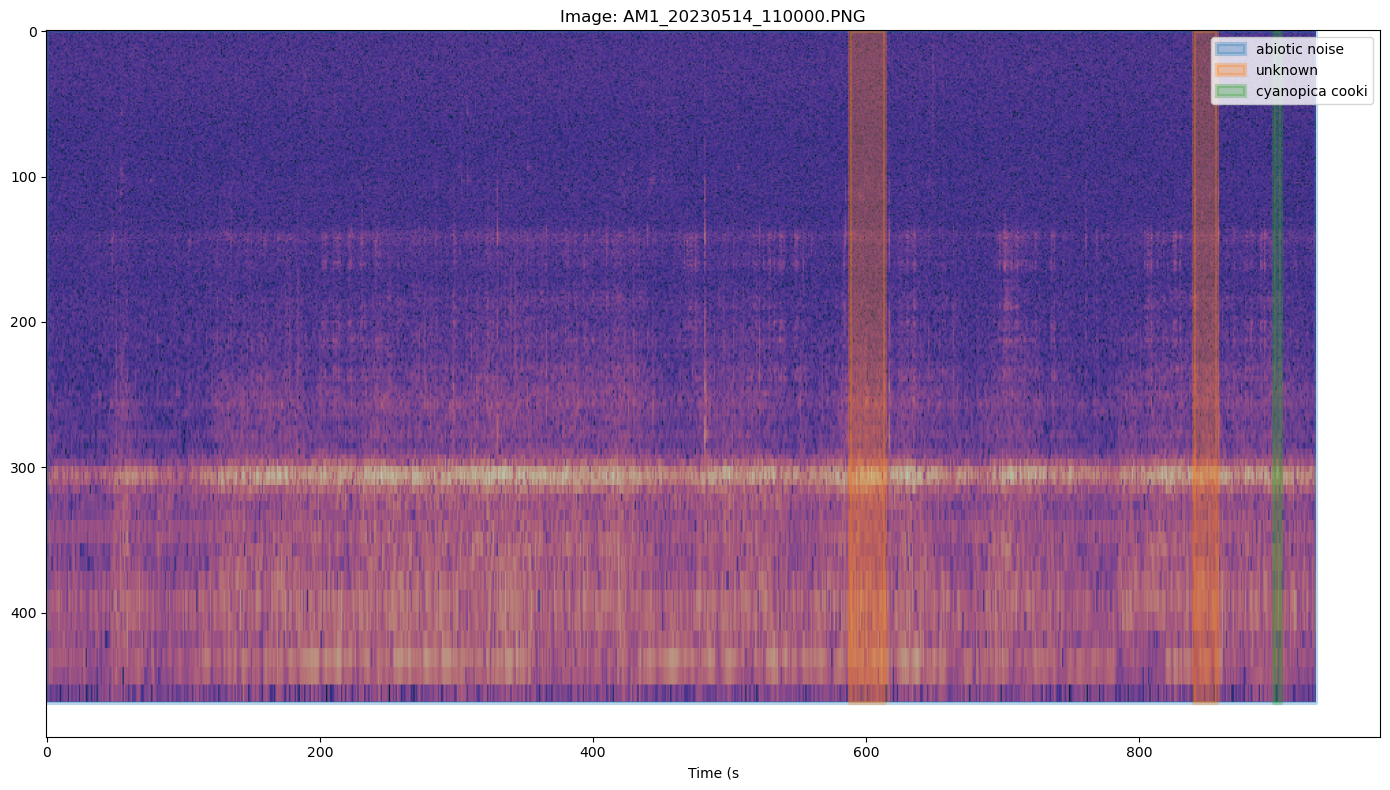

Image shape: (462, 930, 4)
Image size: 630 KB
Image resolution: 1400x800 pixels


In [91]:
# Function to load and display audio images with annotations
def load_and_display_image(image_path, annotations_df):
    # Load the audio image
    img = plt.imread(image_path)
    
    # Create a figure and axis for the image
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Display the audio image
    ax.imshow(img, aspect='auto')
    ax.set_title(f'Image: {os.path.basename(image_path)}')
    
    # Load the corresponding annotations from the DataFrame
    audio_name = os.path.splitext(os.path.basename(image_path))[0] + '.WAV'
    print(audio_name)
    filtered_df = annotations_df[annotations_df['path'].str.contains(audio_name)]
    
    # Convert audio_duration to seconds
    audio_duration = hms_to_seconds(filtered_df['audio_duration'].values[0])
    
    # Create a dictionary to map labels to colors
    label_to_color = {}
    
    # Add annotation boxes to the image with the same color for labels with the same name
    for index, row in filtered_df.iterrows():
        start_time = hms_to_seconds(row['start_time'])
        end_time = hms_to_seconds(row['end_time'])
        if start_time is not None and end_time is not None:
            start = int(start_time / audio_duration * img.shape[1])
            end = int(end_time / audio_duration * img.shape[1])
            label = row['specie']
            if label not in label_to_color:
                label_to_color[label] = list(mcolors.TABLEAU_COLORS.values())[len(label_to_color) % len(mcolors.TABLEAU_COLORS)]
            color = label_to_color[label]
            ax.fill_betweenx(y=[0, img.shape[0]], x1=start, x2=end, alpha=0.3, label=label, color=color, linewidth=3)

    # Configure plot settings
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="best")
    #ax.legend(loc='best')
    ax.set_xlabel('Time (s')

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Print image compression
    print(f'Image shape: {img.shape}')
    print(f'Image size: {os.path.getsize(image_path) / 1024:.0f} KB')

    # Print images resolution
    dpi = fig.get_dpi()
    width, height = fig.get_size_inches()
    print(f'Image resolution: {width * dpi:.0f}x{height * dpi:.0f} pixels')

image_path = ROOT_PATH + "Data/Dataset/Images/" + filtered_df["path"][0].replace(".WAV", ".PNG")
load_and_display_image(image_path, df)


In [92]:
'''sample_audio = ROOT_PATH + "Data/Dataset/Audios/" + filtered_df["path"][0]

# Cargar el archivo de audio y obtener la frecuencia de muestreo
y, sr = librosa.load(sample_audio, sr=None)

# Imprimir la frecuencia de muestreo
print("Frecuencia de muestreo:", sr, "Hz")'''

MIN_FREQUENCY = 1
MAX_FREQUENCY = 16000

In [93]:
image_path = ROOT_PATH + "Data/Dataset/Images/" + filtered_df["path"][0].replace(".WAV", ".PNG")
img = plt.imread(image_path)
print(img.shape[0])

462


0 930 89.40934386186865 462
588 614 56.532604480897646 81.55002306941253
899 904 63.718516073828084 73.3583304699975
840 857 66.52284069333587 88.79495982645153


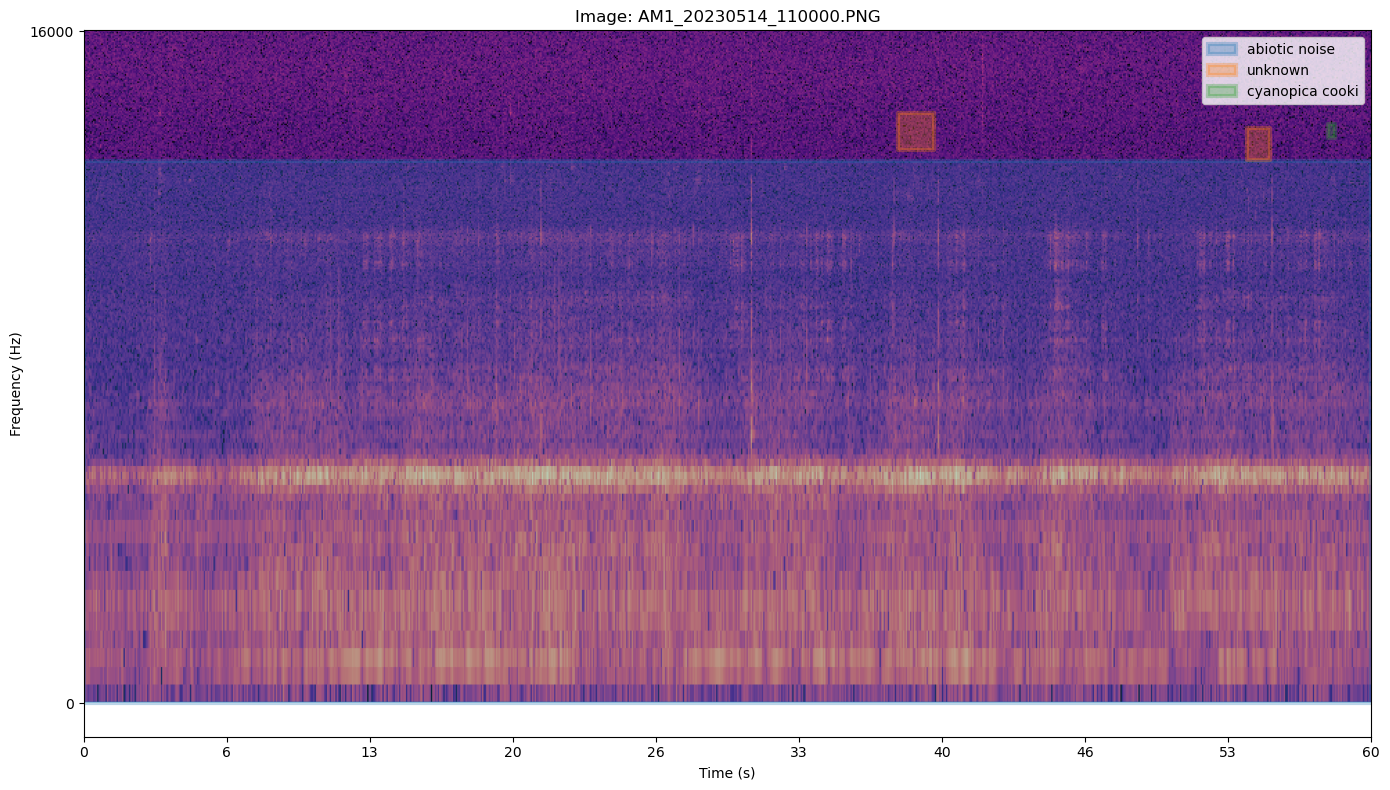

In [94]:
import numpy as np
import math

# Load and display audio images with annotations
def load_and_display_image(image_path, annotations_df):
    # Load the audio image
    img = plt.imread(image_path)
    
    # Create a figure and axis for the image
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Display the audio image
    ax.imshow(img, aspect='auto')
    ax.set_title(f'Image: {os.path.basename(image_path)}')
    
    # Load the corresponding annotations from the DataFrame
    audio_name = os.path.splitext(os.path.basename(image_path))[0] + '.WAV'
    filtered_df = annotations_df[annotations_df['path'].str.contains(audio_name)]
    
    # Convert audio_duration to seconds
    audio_duration = hms_to_seconds(filtered_df['audio_duration'].values[0])
    
    # Create a dictionary to map labels to colors
    label_to_color = {}
    
    # Add annotation boxes to the image with the same color for labels with the same name
    for index, row in filtered_df.iterrows():
        start_time = hms_to_seconds(row['start_time'])
        end_time = hms_to_seconds(row['end_time'])
        low_frequency = row['low_frequency']
        high_frequency = row['high_frequency']
        if start_time is not None and end_time is not None:
            start = int(start_time / audio_duration * img.shape[1])
            end = int(end_time / audio_duration * img.shape[1])

            # Calculate vertical coordinates based on frequency range (0 to MAX_FREQUENCY)
            if low_frequency == 0:
                bottom = 0
            else:
                # bottom = float(((2595 * math.log(1 + (low_frequency/700), 10))) * img.shape[0])
                bottom = float(np.log(low_frequency) / np.log(MAX_FREQUENCY) * img.shape[0])

            if high_frequency == MAX_FREQUENCY:
                top = MAX_FREQUENCY
            else:
                # top = float(((2595 * math.log(1 + (high_frequency/700), 10))) * img.shape[0])
                top = float(np.log(high_frequency) / np.log(MAX_FREQUENCY) * img.shape[0])

            # Invert the y-coordinates
            bottom, top = img.shape[0] - top, img.shape[0] - bottom

            label = row['specie']
            if label not in label_to_color:
                label_to_color[label] = list(mcolors.TABLEAU_COLORS.values())[len(label_to_color) % len(mcolors.TABLEAU_COLORS)]
            color = label_to_color[label]
            ax.fill_betweenx(y=[bottom, top], x1=start, x2=end, alpha=0.3, label=label, color=color, linewidth=3)

            print(start, end, bottom, top)
    
    # Configure plot settings
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc="best")
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Frequency (Hz)')

    # Customize y-axis ticks and labels for frequency
    freq_ticks = [0, MAX_FREQUENCY]
    freq_labels = [str(tick) for tick in freq_ticks]
    ax.set_yticks([int(tick / MAX_FREQUENCY * img.shape[0]) for tick in freq_ticks])
    ax.set_yticklabels(np.flipud(freq_labels))  # Invert the frequency labels

    # Customize x-axis
    ax.set_xlim([0, 60])
    ax.set_xticks(np.linspace(0, img.shape[1], num=10))
    ax.set_xticklabels([str(int(tick / img.shape[1] * audio_duration)) for tick in ax.get_xticks()])

    # Show the plot
    plt.tight_layout()
    plt.show()

image_path = ROOT_PATH + "Data/Dataset/Images/" + filtered_df["path"][0].replace(".WAV", ".PNG")
load_and_display_image(image_path, df)


In [96]:
# List image files in the Images directory
image_files = [os.path.join(image_root_directory, file) for file in os.listdir(image_root_directory) if file.endswith('.jpg')]

# Display each image along with annotations
for image_path in image_files:
    load_and_display_image(image_path, df)